# Data Descriptions

Well here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of used cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle. In this hackathon, you will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

Let’s see if your data science skills can help you predict the price of a used car based on a given set of features discussed below.

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
train = pd.read_excel("./Participants_Data_Used_Cars/Data_Train.xlsx")
test = pd.read_excel("./Participants_Data_Used_Cars/Data_Test.xlsx")
train.shape,test.shape

((6019, 13), (1234, 12))

In [50]:
train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [51]:
train.isnull().sum()/len(train)*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [52]:
test.isnull().sum()/len(test)*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.000000
Engine                0.810373
Power                 0.810373
Seats                 0.891410
New_Price            85.251216
dtype: float64

In [53]:
# from both train and test we can drop New_price column as it contains 85% null values
train.drop("New_Price",axis=1,inplace=True)
test.drop("New_Price",axis=1,inplace=True)

In [54]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [55]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [56]:
train.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


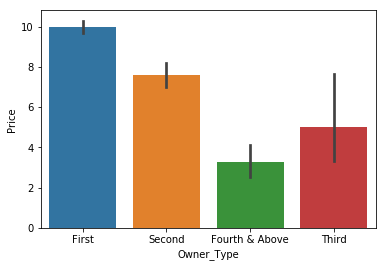

In [57]:
import seaborn as sns
sns.barplot(train.Owner_Type,train.Price)

# Note:
* sales price of the old car is very much dependent on owner type

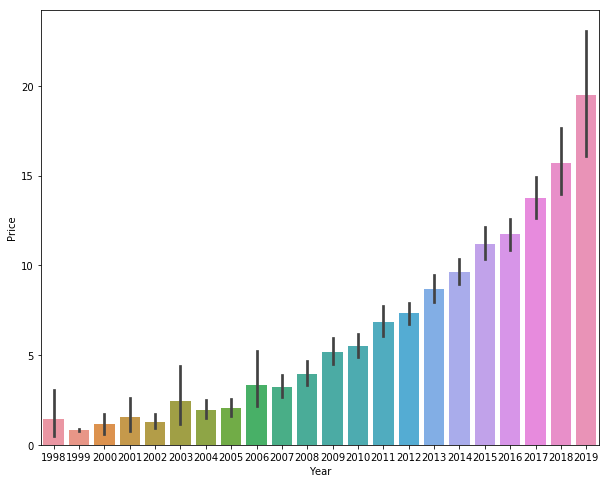

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(train.Year,train.Price)

# Note:
* We can clearly see from the above plot that the recent year used car has high price than the previous all the year

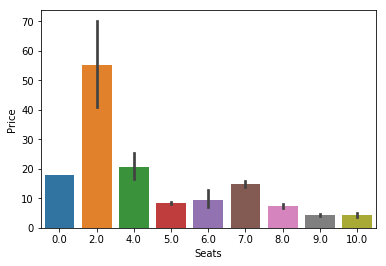

In [59]:
sns.barplot(train.Seats,train.Price)

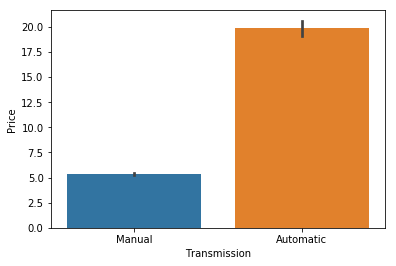

In [60]:
sns.barplot(train.Transmission,train.Price)

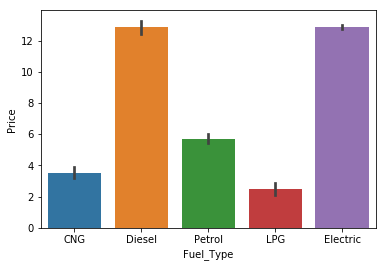

In [61]:
sns.barplot(train.Fuel_Type,train.Price)

In [62]:
train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


In [63]:
train.Mileage = train.Mileage.map(lambda x: str(x).split(" ")[0])
train.Engine = train.Engine.map(lambda x: str(x).split(" ")[0])
train.Power = train.Power.map(lambda x: str(x).split(" ")[0])
train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50


In [64]:
train.Mileage = train.Mileage.astype("float")
train.Engine = train.Engine.astype("float")
#train.Power = train.Power.astype("float")

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ["Location","Fuel_Type","Transmission","Owner_Type"]

In [88]:
for col in cols:
    train[col] = le.fit_transform(train[col])

In [93]:
train = train[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Engine',
               'Seats','Price']]
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price
0,9,2010,72000,0,1,0,26.60,998.0,5.0,1.75
1,10,2015,41000,1,1,0,19.67,1582.0,5.0,12.50
2,2,2011,46000,4,1,0,18.20,1199.0,5.0,4.50
3,2,2012,87000,1,1,0,20.77,1248.0,7.0,6.00
4,3,2013,40670,1,0,2,15.20,1968.0,5.0,17.74


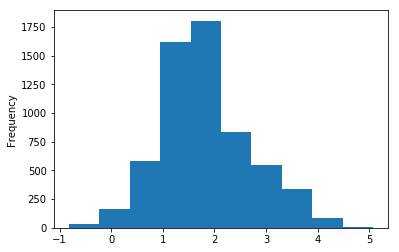

In [99]:
# data has skewness so better do log transform
np.log(train.Price).plot(kind="hist")

In [101]:
train.Year = train.Year.astype("object")

train.Year = le.fit_transform(train.Year)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [115]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values="NaN",strategy="mean")

train = pd.DataFrame(imp.fit_transform(train),columns=train.columns)

In [119]:
Y = np.log(train.iloc[:,-1]) #do log transformation
X = train.iloc[:,:-1]

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(sc_X,Y,test_size=0.2)

In [122]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

y_pred = lin_reg.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error,r2_score

In [124]:
r2_score(Y_test,y_pred)

0.853294937160127

In [125]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.3432670075243619

In [130]:
np.exp(Y_test[:5])

1482    8.90
2764    3.60
3740    3.00
4103    5.25
2759    7.50
Name: Price, dtype: float64

In [131]:
np.exp(y_pred[:5])

array([ 8.10385365,  4.70425506,  1.81624502,  5.07527363, 12.56132813])

In [134]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [135]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

r2_score(Y_test,y_pred)

0.871150528241086

In [136]:
rand_reg = RandomForestRegressor()

rand_reg.fit(X_train,Y_train)
y_pred = rand_reg.predict(X_test)

r2_score(Y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9080470958291355

In [137]:
np.exp(y_pred[:5])

array([11.31044522,  4.37947585,  2.27842495,  5.58088392,  9.19372612])

In [139]:
np.exp(Y_test[:5])

1482    8.90
2764    3.60
3740    3.00
4103    5.25
2759    7.50
Name: Price, dtype: float64

In [140]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.2717641953091068

------------------------

In [142]:
test.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0


In [143]:
test.Mileage = test.Mileage.map(lambda x: str(x).split(" ")[0])
test.Engine = test.Engine.map(lambda x: str(x).split(" ")[0])
test.Power = test.Power.map(lambda x: str(x).split(" ")[0])
test.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0


In [145]:
test.Mileage = test.Mileage.astype("float")
test.Engine = test.Engine.astype("float")
#test.Power = test.Power.astype("float")

In [147]:
colse = ["Location","Fuel_Type","Transmission","Owner_Type"]

for col in colse:
    test[col] = le.fit_transform(test[col])
    
test = test[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Engine',
               'Seats']]
test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats
0,4,2014,40929,0,1,0,32.26,998.0,4.0
1,3,2013,54493,3,1,2,24.70,796.0,5.0
2,9,2017,34000,1,1,0,13.68,2393.0,7.0
3,5,2012,139000,1,1,0,23.59,1364.0,5.0
4,9,2014,29000,3,1,0,18.50,1197.0,5.0


In [148]:
test.Year = test.Year.astype("object")

test.Year = le.fit_transform(test.Year)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [149]:
test = pd.DataFrame(imp.fit_transform(test),columns=test.columns)

In [153]:
sc_X.shape

(6019, 9)

In [152]:
test.shape

(1234, 9)

In [154]:
sc_test = pd.DataFrame(sc.fit_transform(test),columns=test.columns)
sc_test.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats
0,-0.538700,0.188527,-0.493990,-1.926746,0.602939,-0.446991,3.156342,-1.060086,-1.563474
1,-0.868113,-0.127993,-0.112811,1.060195,0.602939,2.043245,1.462341,-1.419628,-0.346333
2,1.108366,1.138087,-0.688711,-0.931099,0.602939,-0.446991,-1.006958,1.422885,2.087949


In [158]:
df = pd.DataFrame()

df["Price"] = np.exp(rand_reg.predict(sc_test))

In [162]:
df.to_excel("submission1.xlsx",index=False)

In [163]:
df.to_excel("submission2.xls",index=False)